Configure an R Analytics Environment
----------------------------------------

### Command line

```bash
conda create -n rcore -c r python=3.5 anaconda rpy2 \
                           r-essentials r-devtools r-viridis r-lattice r-nycflights13
```

or if the Conda environment already exists:

```bash
conda install -n rcore -c r python=3.5 anaconda rpy2 \
                            r-essentials r-devtools r-viridis r-lattice r-nycflights13
```

### Navigator GUI

![Anaconda Navigator](http://ijstokes-public.s3.amazonaws.com/dspyr/img/screenshot_navigator_create_environment.png)

Then select the correct Conda environment (`rcore`) and add in the packages (by searching for *All* packages):

* `anaconda`
* `r-essentials`
* `r-devtools`
* `r-lattice`
* `r-nycflights13`
* `r-viridis`
* `rpy2`

**IMPORTANT:** Make sure you pick *Kernel -> Change Kernel -> R [conda env:rcore]* in your Jupyter Notebook.

**NOTE:** Recent versions of Anaconda may require you to use Navigator (not Jupyter) to select the `rcore` environment and start a Jupyter Server instance from there.  From there the *Change Kernel* option should list *R* as one of the kernels.  It may not indicate `rcore` in the name.

Additionally 
[read (and watch) all about *viridis* and color theory here](https://bids.github.io/colormap/)

### Initial setup

For convenience when working in a Jupyter setting the following will improve the screen-layout of output:

In [1]:
library(repr)

options(repr.plot.width=6,
        repr.plot.height=4)
options(repr.matrix.max.rows=10,
        repr.matrix.max.cols = 20) 

## Access and process data with `dplyr` and `tidyr`

In [2]:
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
library(nycflights13)

ERROR: Error in library(nycflights13): there is no package called ‘nycflights13’


In [4]:
flights

ERROR: Error in eval(expr, envir, enclos): object 'flights' not found


### `dplyr::arrange()`

In [ ]:
arrange(flights, carrier, origin, dest)

In [ ]:
flights

In [ ]:
flights %>% arrange(dest, origin)

### `dplyr::select()`

In [ ]:
select(flights, carrier, origin, dest)

In [ ]:
flights %>% select(carrier, origin, dest)

In [ ]:
flights %>%
    select(origin, dest, carrier) %>% 
    arrange(origin, dest)

### `group_by()` and `summarise()`

In [ ]:
flights %>%
  group_by(carrier) %>%
  select(arr_delay, dep_delay) %>%
  summarise(
    arr = mean(arr_delay, na.rm = TRUE),
    dep = mean(dep_delay, na.rm = TRUE)
  )

In [ ]:
flights %>%
  group_by(carrier, origin) %>%
  select(arr_delay, dep_delay) %>%
  summarise(
    arr = mean(arr_delay, na.rm = TRUE),
    dep = mean(dep_delay, na.rm = TRUE)
  )

In [ ]:
filter(flights, origin == 'JFK')

In [ ]:
flights %>% filter(origin == 'LGA') %>% select(dep_delay, arr_delay, carrier, dest)

In [ ]:
filter(flights, origin == 'JFK', dest == 'LAX', month == 2)

In [ ]:
iris %>%
 group_by(Species) %>%
 summarise(Sepal.Width.Avg = mean(Sepal.Width))

### tidyr and `gather()`/`spread()`

**NOTE:** The latest version of `tidyr` removes `table4`, therefore the last example below may not work in your environment.

In [ ]:
table1

In [ ]:
table2

**NOTE:** In older versions of the `tidyr` package (as used in the accompanying video) `table2` had `key` and `value` instead of `type` and `count` -- if so, revise the code below to execute:

    spread(table2, key, value)

In [ ]:
# table2 -> table1
spread(table2, type, count)

**NOTE:** If `table4` does not exist for you it is probably because you have the latest `tidyr` version where this variation has been removed.  The example in the video still demonstrates how `gather()` works.

In [ ]:
table4

In [ ]:
gather(table4, "year", "cases", 2:3)

7.3 Create visualizations with ggplot 
-------------------------------------

In [ ]:
library(repr)

options(repr.plot.width=6,
        repr.plot.height=3)
options(repr.matrix.max.rows=10,
        repr.matrix.max.cols = 20) 

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
diamonds

In [ ]:
diamonds %>% ggplot(aes(carat, price)) +
  geom_point()

In [ ]:
diamonds %>% ggplot(aes(carat, price)) +
  geom_point(color="blue", alpha=0.01)

In [ ]:
diamonds %>% ggplot(aes(carat, price)) +
  geom_point(color="blue", alpha=0.05) +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
diamonds %>% ggplot(aes(carat, price)) +
  geom_hex(color="blue", bins=30) +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
library(viridis)

In [ ]:
diamonds %>% ggplot(aes(carat, price)) +
  geom_hex(color="blue", bins=30) +
  scale_fill_viridis() +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=cut)) +
  geom_point(alpha=0.3) +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=cut)) +
  geom_point(size=0.1, alpha=0.3) +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=cut)) +
  geom_point(size=0.1) +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10") + 
  facet_wrap(~ cut)

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=cut)) +
  geom_smooth() +
  scale_x_continuous(trans="log2") +
  scale_y_continuous(trans="log10")

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=cut)) +
  geom_smooth()

In [ ]:
summary(diamonds)

In [ ]:
dim(diamonds)

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=clarity)) +
  geom_smooth() +
  labs(title='Comparison of 53940 diamonds')

In [ ]:
diamonds %>% ggplot(aes(carat, price, color=color)) +
  geom_smooth() +
  labs(title='Comparison of 53940 diamonds',
       y='price ($)', x='ct.')

### `caret`::`featurePlot()`

In [ ]:
library(repr)

options(repr.plot.width=8,
        repr.plot.height=5)
options(repr.matrix.max.rows=10,
        repr.matrix.max.cols = 20) 

In [ ]:
library(caret)
data(iris)
# pair-wise plots of all 4 attributes, dots colored by class

In [ ]:
iris

In [ ]:
library(dplyr)

In [ ]:
featurePlot(x    = iris %>% select(Sepal.Width, Sepal.Length, Petal.Width, Petal.Length), 
            y    = iris$Species, 
            plot = "pairs", 
            auto.key=list(columns=3))

In [ ]:
library(caret)
data(iris)

In [ ]:
featurePlot(x        = iris %>% select(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width), 
            y        = iris$Species, 
            plot     = "pairs", 
            auto.key = list(columns=3))

In [ ]:
featurePlot(x        = iris %>% select(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width), 
            y        = iris$Species, 
            plot     = "density", 
            scales   = list(x=list(relation="free"), y=list(relation="free")), 
            auto.key = list(columns=3))

**NOTE:** The following *ellipse* plot requires the full `caret` package to be installed, which will be described in the next section.

In [ ]:
featurePlot(x = iris %>% select(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width),
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

7.4 Use linear models for predictive analytics
----------------------------------------------

In [ ]:
require(caTools)

set.seed(123) 

sample = sample.split(diamonds, SplitRatio = .80)
train  = subset(diamonds, sample == TRUE)
test   = subset(diamonds, sample == FALSE)

In [ ]:
fit = lm(price ~ carat + color + clarity + cut, data=train)

In [ ]:
fit

In [ ]:
summary(fit)

In [ ]:
df <- data.frame("observed"  = test$price,
                 "predicted" = predict(fit, test))

In [ ]:
plot(df, col='red')

In [ ]:
library(viridis)

In [ ]:
df %>% ggplot(aes(observed, predicted)) +
  geom_hex(color="blue", bins=30) +
  scale_fill_viridis()

In [ ]:
fit

In [ ]:
plot(fit)

### `caret` classification and regression training in R

A wrapper around almost 200 statistical and predicitive models.

Details [available online](https://topepo.github.io/caret/)

Those models need to be installed, using the following command.

**NOTE:** You may need to execute this from an R shell started from the command line, in case it requests interactive input (e.g. selection of a mirror source) -- command interaction is not supported through the Jupyter Notebook interface to R.

In [ ]:
install.packages("caret", dependencies = c("Depends", "Suggests"))

Experience suggests that this R-based package install can scramble your installed version of `caret`, in which case it is a good idea to execute the following command to force-re-install the `r-caret` package (**NOTE:** be sure the environment name `rcore` matches the environment you are using).  Do this by executing the following from the command line:

    conda install -f -n rcore -c r r-caret

In [ ]:
library(dplyr)
library(viridis)
library(caret)

In [ ]:
fit_pls <- train(price ~ carat + color + clarity + cut,
                 data=train, 
                 method='pls')

In [ ]:
df <- data.frame("observed"=test$price,
                 "predicted"=predict(fit_pls, test))

In [ ]:
df %>% ggplot(aes(observed, predicted)) +
  geom_hex(color="blue", bins=30) +
  scale_fill_viridis()

7.5 Create interactive visualizations with rBokeh and Shiny
-----------------------------------------------------------

`rbokeh` and `shiny` are both part of the `r-essentials` package, so you have them installed already.  The examples below are adapted from [the rbokeh documentation](https://hafen.github.io/rbokeh/)

In [ ]:
library(dplyr)
library(rbokeh)
library(shiny)

In [ ]:
install.packages("rbokeh")

In [ ]:
z <- lm(dist ~ speed, data = cars)

p <- figure(width = 600, height = 600) %>%
  ly_points(cars, hover = cars) %>%
  ly_lines(lowess(cars), legend = "lowess") %>%
  ly_abline(z, type = 2, legend = "lm")
p

In [ ]:
h <- figure(width = 600, height = 300) %>%
  ly_hist(   eruptions, data = faithful, breaks = 30, freq = FALSE) %>%
  ly_density(eruptions, data = faithful)
h

In [ ]:
doubles <- read.csv("https://gist.githubusercontent.com/hafen/77f25b556725b3d0066b/raw/10f0e811f09f2b9f0f9ccfb542e296dfac2761d4/doubles.csv")

In [ ]:
ly_baseball <- function(x) {
  base_x <- c(90 * cos(pi/4), 0, 90 * cos(3 * pi/4), 0)
  base_y <- c(90 * cos(pi/4), sqrt(90^2 + 90^2), 90 * sin(pi/4), 0)
  distarc_x <- lapply(c(2:4) * 100, function(a)
    seq(a * cos(3 * pi/4), a * cos(pi/4), length = 200))
  distarc_y <- lapply(distarc_x, function(x)
    sqrt((x[1]/cos(3 * pi/4))^2 - x^2))
      
  x %>%
    ## boundary
    ly_segments(c(0, 0), c(0, 0), c(-300, 300), c(300, 300), alpha = 0.4) %>%
    ## bases
    ly_crect(base_x, base_y, width = 10, height = 10,
      angle = 45*pi/180, color = "black", alpha = 0.4) %>%
    ## infield/outfield boundary
    ly_curve(60.5 + sqrt(95^2 - x^2),
      from = base_x[3] - 26, to = base_x[1] + 26, alpha = 0.4) %>%
    ## distance arcs (ly_arc should work here and would be much simpler but doesn't)
    ly_multi_line(distarc_x, distarc_y, alpha = 0.4)
}

In [ ]:
figure(xgrid = FALSE, ygrid = FALSE, width = 630, height = 540,
  xlab = "Horizontal distance from home plate (ft.)",
  ylab = "Vertical distance from home plate (ft.)") %>%
  ly_baseball() %>%
  ly_hexbin(doubles, xbins = 50, shape = 0.77, alpha = 0.75, palette = "Spectral10")

### Shiny

[Shiny provides a mechanism to build R-based web-apps](http://shiny.rstudio.com/)

Create a folder `iris_explorer` and put the following two code blocks into files in that folder named `server.R` and `ui.R` respectively.

Then start up R from the command line in the folder containing `iris_explorer` (one level up from where you put the `.R` files).

Then execute:

```R
library(shiny)
runApp("iris_explorer")
```

In [ ]:
# server.R
function(input, output, session) {

  # Combine the selected variables into a new data frame
  selectedData <- reactive({
    iris[, c(input$xcol, input$ycol)]
  })

  clusters <- reactive({
    kmeans(selectedData(), input$clusters)
  })

  output$plot1 <- renderPlot({
    palette(c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3",
      "#FF7F00", "#FFFF33", "#A65628", "#F781BF", "#999999"))

    par(mar = c(5.1, 4.1, 0, 1))
    plot(selectedData(),
         col = clusters()$cluster,
         pch = 20, cex = 3)
    points(clusters()$centers, pch = 4, cex = 4, lwd = 4)
  })

}

In [ ]:
# ui.R
pageWithSidebar(
  headerPanel('Iris k-means clustering'),
  sidebarPanel(
    selectInput('xcol', 'X Variable', names(iris)),
    selectInput('ycol', 'Y Variable', names(iris),
                selected=names(iris)[[2]]),
    numericInput('clusters', 'Cluster count', 3,
                 min = 1, max = 9)
  ),
  mainPanel(
    plotOutput('plot1')
  )
)

7.6 Bridge between R and Python with `rpy2`
---------------------------------------------

The `rpy2` package needs to be installed for this section.

```
conda install -c r rpy2
```

Then you need to switch kernels to the Python kernel:

*Kernel -> Change kernel -> Python [conda env:rcore]*

In [1]:
from bokeh.sampledata.autompg import autompg
from bokeh.charts             import Scatter
from bokeh.io                 import output_notebook, show

import pandas as pd

In [2]:
pd.options.display.max_rows = 8
output_notebook()

Loading BokehJS ...

In [3]:
autompg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
...,...,...,...,...,...,...,...,...,...
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
tooltips = [
      ('Make','@make'),
      ('MPG', '@mpg'),
      ('hp',  '@hp')
    ]

autompg.origin.replace([1,2,3], 'American European Asian'.split(), inplace=True)
autompg['make'] = pd.Series((n.split()[0].title() for n in autompg.name), 
                            index=autompg.index)

In [5]:
cars_sp = Scatter(autompg, x='weight', y='mpg', color='origin',
                  width=600, height=300, legend='top_right',
                  tooltips=tooltips)
show(cars_sp)

In [6]:
car_subset = autompg[autompg.make.isin('Ford Volkswagen Honda'.split())]

In [7]:
car_subset

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,make
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino,Ford
5,15.0,8,429.0,198,4341,10.0,70,American,ford galaxie 500,Ford
17,21.0,6,200.0,85,2587,16.0,70,American,ford maverick,Ford
19,26.0,4,97.0,46,1835,20.5,70,European,volkswagen 1131 deluxe sedan,Volkswagen
...,...,...,...,...,...,...,...,...,...,...
378,32.0,4,91.0,67,1965,15.7,82,Asian,honda civic (auto),Honda
383,22.0,6,232.0,112,2835,14.7,82,American,ford granada l,Ford
387,27.0,4,140.0,86,2790,15.6,82,American,ford mustang gl,Ford
390,28.0,4,120.0,79,2625,18.6,82,American,ford ranger,Ford


### R Magic

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import rpy2

In [10]:
%load_ext rpy2.ipython

In [11]:
%R require(ggplot2)

array([1], dtype=int32)

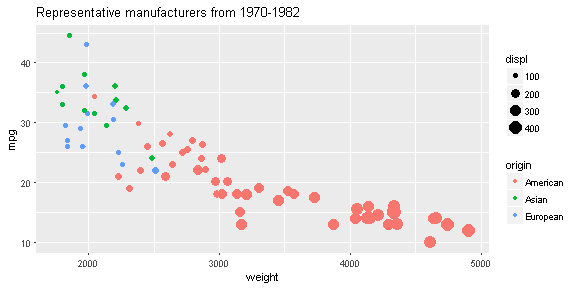

In [12]:
%%R -i car_subset -w 8 -h 4 -u in
ggplot(data=car_subset) +
    geom_point(aes(x=weight,y=mpg,color=origin,size=displ)) +
    labs(title='Representative manufacturers from 1970-1982')

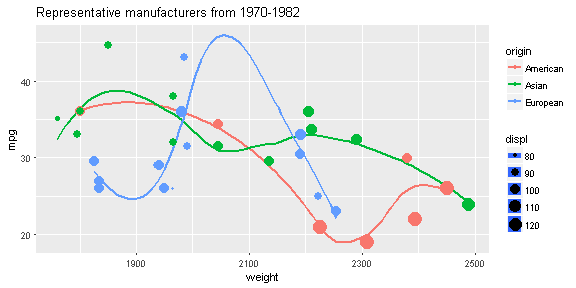

In [13]:
%%R -w 8 -h 4 -u in
efficiency <- lm(mpg ~ weight + displ + cyl + hp,
                data=car_subset)

library(dplyr)
library(tidyr)

car_subset %>% filter(weight < 2500) %>%
    ggplot(aes(x=weight,y=mpg,color=origin,size=displ)) +
    geom_smooth(se=FALSE) + geom_point() +
    labs(title='Representative manufacturers from 1970-1982')

In [14]:
%R -i autompg

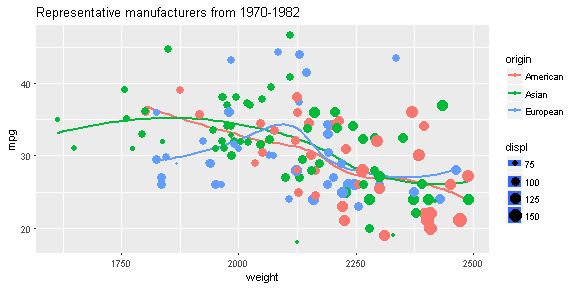

In [15]:
%%R -i autompg -w 8 -h 4 -u in
efficiency = lm(mpg ~ weight + displ + cyl + hp,
                data=autompg)

library(dplyr)
library(tidyr)

autompg %>% filter(weight < 2500) %>%
    ggplot(aes(x=weight,y=mpg,color=origin,size=displ)) +
    geom_smooth(se=FALSE) + geom_point() +
    labs(title='Representative manufacturers from 1970-1982')

In [16]:
%%R
X = c(1,4,5,7)
s <- sd(X)
m <- mean(X)

In [17]:
%Rpull X s m

In [18]:
X

array([ 1.,  4.,  5.,  7.])

In [19]:
type(X)

numpy.ndarray

In [20]:
s

array([ 2.5])

In [21]:
type(s)

numpy.ndarray

In [22]:
m

array([ 4.25])

In [23]:
import numpy as np

Y = np.array([4.5,6.3,7.9])

In [24]:
Y

array([ 4.5,  6.3,  7.9])

In [25]:
%Rpush Y

In [26]:
%%R -o sy,my

sy <- sd(Y)
my <- mean(Y)

In [27]:
sy

array([ 1.70098011])

In [28]:
my

array([ 6.23333333])

### rpy2.robjects

In [29]:
import rpy2.robjects as ro

In [30]:
ro.r('''
        # create a function `f`
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        # call the function `f` with argument value 3
        f(3)
        ''')

array([ 18.84955592])

In [31]:
r_f = ro.r['f']

In [32]:
r_f(10)

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000203139D7A48 / R:0x000002031520D150>
[62.831853]

In [33]:
result = r_f(10)

In [34]:
result

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000020311316B88 / R:0x000002031520D030>
[62.831853]

In [35]:
result + 5

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002031134F3C8 / R:0x00000203150EF0B8>
[62.831853, 5.000000]

In [36]:
result[0]

62.83185307179586

Read more in the [rpy2 Introduction](http://rpy2.readthedocs.io/en/version_2.8.x/introduction.html)